Sales prediction means predicting how much of a product people will buy based on
factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to
predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

In [5]:
# prompt: import from drive folder and open file Colab Notebooks / Advertising/Advertising.csv

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import pandas
import pandas as pd

# Define the file path
file_path = '/content/drive/My Drive/Colab Notebooks/Advertising/Advertising.csv'

# Read the CSV file into a pandas DataFrame
try:
  df = pd.read_csv(file_path)
  print("File imported successfully.")
  print(df.head()) # Print the first 5 rows to verify
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File imported successfully.
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [6]:
df = pd.read_csv(file_path)
df

Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

In [9]:
# prompt: check for null and dupliates on df

# Check for null values
print("Null values per column:")
print(df.isnull().sum())
# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

Null values per column:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Number of duplicate rows:
0


In [10]:
# prompt: datatypes of df

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [14]:
df.drop('Unnamed: 0',inplace=True,axis=1)

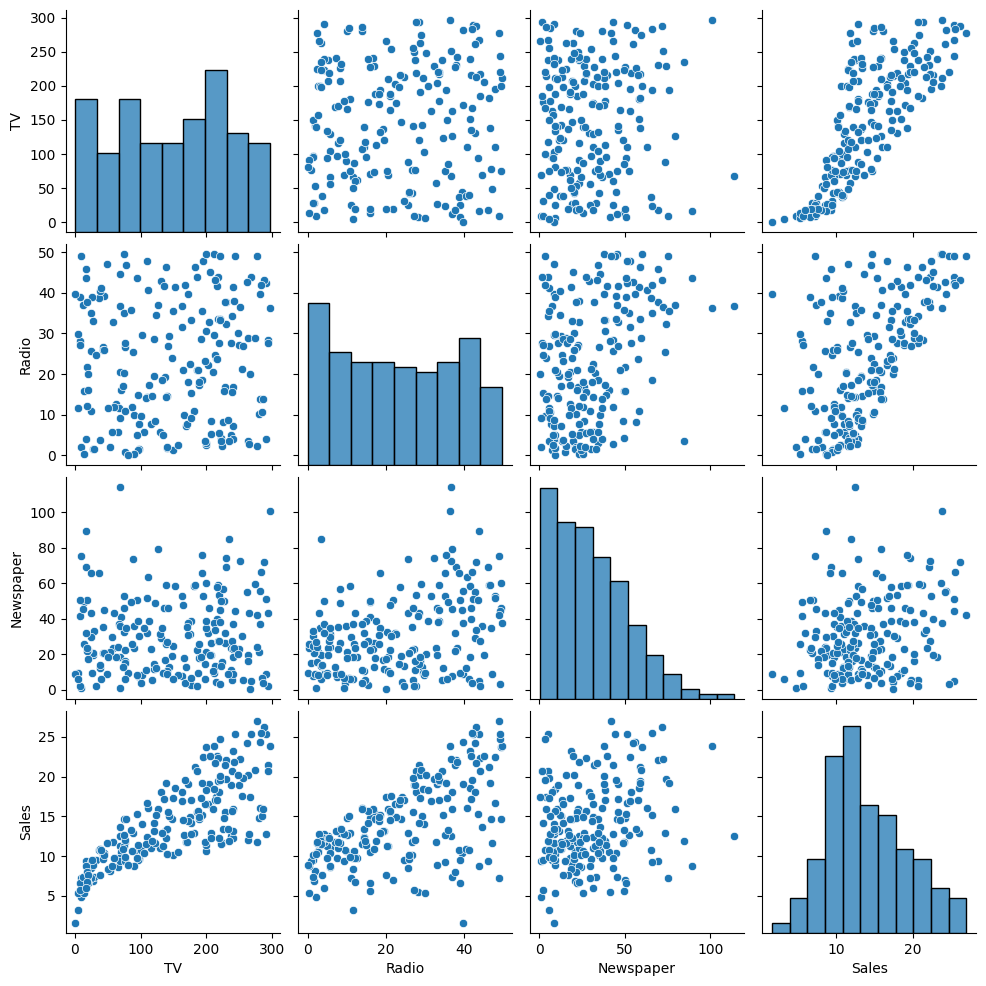

In [16]:
# prompt: pairplot of df

import seaborn as sns
sns.pairplot(df)

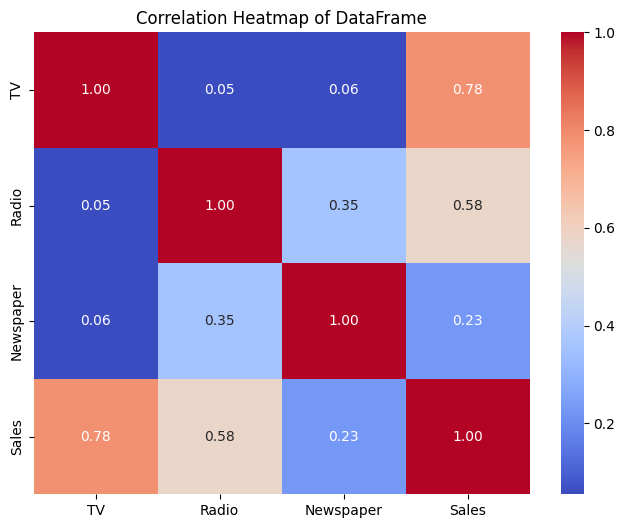

In [17]:
# prompt: heatmap of df

import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of DataFrame')
plt.show()

In [15]:
# prompt: make y = "Sales" and the rest X

y = df['Sales']
X = df.drop('Sales', axis=1)

X

TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]

In [18]:
# prompt: Model Training df

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# You can now use the trained 'model' to make predictions on new data.
# For example, to predict sales for new advertising spending:
# new_data = pd.DataFrame({'TV': [100], 'Radio': [20], 'Newspaper': [10]})
# predicted_sales = model.predict(new_data)
# print(f"Predicted Sales for new data: {predicted_sales}")

Mean Squared Error: 3.1740973539761033
R-squared: 0.899438024100912


In [19]:
# prompt: Model Training df using decision tree

from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Mean Squared Error: {mse_dt}")
print(f"Decision Tree R-squared: {r2_dt}")

# You can now use the trained 'decision_tree_model' to make predictions on new data.
# For example, to predict sales for new advertising spending:
# new_data = pd.DataFrame({'TV': [100], 'Radio': [20], 'Newspaper': [10]})
# predicted_sales_dt = decision_tree_model.predict(new_data)
# print(f"Predicted Sales (Decision Tree) for new data: {predicted_sales_dt}")

Decision Tree Mean Squared Error: 2.175
Decision Tree R-squared: 0.9310914968293178


In [20]:
# prompt: Model Training df using Random forest

from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

# You can now use the trained 'random_forest_model' to make predictions on new data.
# For example, to predict sales for new advertising spending:
# new_data = pd.DataFrame({'TV': [100], 'Radio': [20], 'Newspaper': [10]})
# predicted_sales_rf = random_forest_model.predict(new_data)
# print(f"Predicted Sales (Random Forest) for new data: {predicted_sales_rf}")


Random Forest Mean Squared Error: 0.5907322499999988
Random Forest R-squared: 0.9812843792541843


In [23]:
# prompt: report the 3 models in a table

data = {'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
        'Mean Squared Error (MSE)': [mse, mse_dt, mse_rf],
        'R-squared (R2)': [r2, r2_dt, r2_rf]}
results_df = pd.DataFrame(data)

print("\nModel Performance Summary:")
print(results_df)


Model Performance Summary:
               Model  Mean Squared Error (MSE)  R-squared (R2)
0  Linear Regression                  3.174097        0.899438
1      Decision Tree                  2.175000        0.931091
2      Random Forest                  0.590732        0.981284



Important Features from Random Forest Model:
     Feature  Importance
0         TV    0.624810
1      Radio    0.362201
2  Newspaper    0.012989


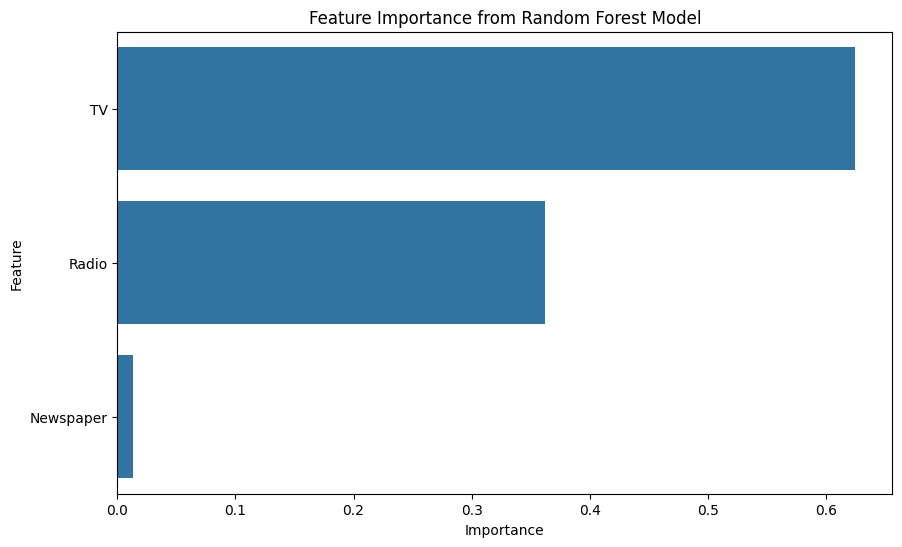

In [24]:
# prompt: important features Random Forest in df

# Get feature importances from the trained Random Forest model
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to store feature names and their importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

print("\nImportant Features from Random Forest Model:")
print(features_df)

# Optionally, visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance from Random Forest Model')
plt.show()

Based on the "Important Features from Random Forest Model" output, here's an important conclusion:

The Random Forest model indicates that TV advertising is the most important factor in predicting sales, followed by Radio advertising. Newspaper advertising has a significantly lower impact on sales compared to TV and Radio. This suggests that allocating more resources towards TV and Radio advertising is likely to have a greater positive effect on sales than increasing Newspaper advertising.